In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time

In [2]:


def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

def get_available_devs():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]


In [5]:
get_available_devs()

['/device:CPU:0', '/device:GPU:0']

500
####### Calculating on the /cpu:0 #######
[[ 126.875   119.      117.     ...,  122.375   123.875   122.8125]
 [ 125.25    124.      117.6875 ...,  121.3125  129.375   115.125 ]
 [ 133.      122.625   120.0625 ...,  124.375   128.875   121.25  ]
 ..., 
 [ 125.5     115.125   116.125  ...,  116.375   123.25    119.5   ]
 [ 131.25    122.9375  121.25   ...,  125.6875  130.375   125.75  ]
 [ 123.875   121.375   116.625  ...,  120.375   124.25    117.375 ]]
{'/cpu:0': [0.43784618377685547], '/gpu:0': []}
####### Calculating on the /gpu:0 #######
[[ 122.375   123.375   121.9375 ...,  120.4375  125.125   123.0625]
 [ 128.      117.      117.4375 ...,  117.125   121.4375  122.8125]
 [ 118.5     117.9375  113.6875 ...,  115.5     121.      119.5625]
 ..., 
 [ 124.1875  117.0625  120.625  ...,  118.125   126.1875  124.625 ]
 [ 127.125   126.8125  121.75   ...,  122.3125  127.25    129.75  ]
 [ 121.375   122.1875  117.625  ...,  121.75    123.0625  121.5   ]]
{'/cpu:0': [0.43784618377685547]

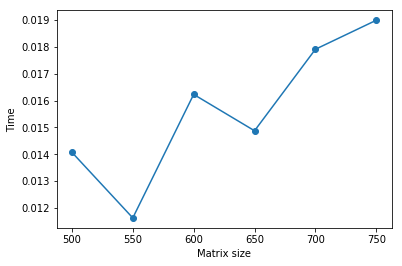

In [7]:
def get_times(maximum_time):

    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    matrix_sizes = range(500,50000,50)

    for size in matrix_sizes:
        print(size)
        for device_name in device_times.keys():

            print("####### Calculating on the " + device_name + " #######")

            shape = (size,size)
            data_type = tf.float16
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)


            with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    print(result)
                    device_times[device_name].append(time_taken)

            print(device_times)

            if time_taken > maximum_time:
                return device_times, matrix_sizes


device_times, matrix_sizes = get_times(1.5)
gpu_times = device_times["/gpu:0"]
cpu_times = device_times["/cpu:0"]

plt.plot(matrix_sizes[:len(gpu_times)], gpu_times, 'o-')
plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-')
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.show()